In [34]:
#!/home/ketan/Projects/DataScience/python/bin/python

# Importing packages
from sklearn import preprocessing as pre
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

class kdd1999:
    """Class to support different methods for kdd1999 problem statement analysis"""
    
    TRAIN_PATH = 'data/kddcup.data.corrected' #'data/kddcup.data_10_percent'
    TEST_PATH = 'data/kddcup.testdata.unlabeled_10_percent'
    COLUMNS = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate", "connection_type"]
    
    def __init__(self):
        self._read_train = False
        self._read_test = False
        self._transform_train = False
        self._transform_test = False
        
        self.le1_train=pre.LabelEncoder()
        self.le2_train=pre.LabelEncoder()
        self.le3_train=pre.LabelEncoder()
        self.le4_train=pre.LabelEncoder()
        
        self.le1_test=pre.LabelEncoder()
        self.le2_test=pre.LabelEncoder()
        self.le3_test=pre.LabelEncoder()
    
    def read_train_data(self):
        """Method to read data"""
        if self._read_train == False:
            print "READING FILE: ./"+self.TRAIN_PATH
            self.train_data=pd.read_csv(self.TRAIN_PATH, header=None)
            self.train_data.columns=self.COLUMNS
            self._read_train = True
            print "DONE."
        else:
            print "Data already read."
            
    def read_test_data(self):
        if self._read_test == False:
            print "READING FILE: ./"+self.TEST_PATH
            self.test_data=pd.read_csv(self.TEST_PATH, header=None)
            self.test_data.columns=self.COLUMNS[:-1]
            self._read_test = True
            print "DONE."
        else:
            print "Data already read."
        
    def transform_train_data(self):
        """Method to encode all labels in different features"""
        if self._transform_train == False:
            self.le1_train.fit(self.train_data['protocol_type'])
            self.train_data['protocol_type']=self.le1_train.transform(self.train_data['protocol_type'])
            
            self.le2_train.fit(self.train_data['service'])
            self.train_data['service']=self.le2_train.transform(self.train_data['service'])
            
            self.le3_train.fit(self.train_data['flag'])
            self.train_data['flag']=self.le3_train.transform(self.train_data['flag'])
            
            self.le4_train.fit(self.train_data['connection_type'])
            self.train_data['connection_type']=self.le4_train.transform(self.train_data['connection_type'])
            
            self._transform_train = True
        else:
            print "Data already transformed."
            
    def inverse_transform_train_data(self):
        """Method to decode all labels in different features"""
        if self._transform_train == True:
            self.train_data['protocol_type']=self.le1_train.inverse_transform(self.train_data['protocol_type'])
            self.train_data['service']=self.le2_train.inverse_transform(self.train_data['service'])
            self.train_data['flag']=self.le3_train.inverse_transform(self.train_data['flag'])
            self.train_data['connection_type']=self.le4_train.inverse_transform(self.train_data['connection_type'])
            
            self._transform_train = False
        else:
            print "Data already inverse transformed."
            
    def transform_test_data(self):
        """Method to encode all labels in different features"""
        if self._transform_test == False:
            self.le1_test.fit(self.test_data['protocol_type'])
            self.test_data['protocol_type']=self.le1_test.transform(self.test_data['protocol_type'])
            
            self.le2_test.fit(self.test_data['service'])
            self.test_data['service']=self.le2_test.transform(self.test_data['service'])
            
            self.le3_test.fit(self.test_data['flag'])
            self.test_data['flag']=self.le3_test.transform(self.test_data['flag'])
            
            self._transform_test = True
        else:
            print "Data already transformed."
            
    def inverse_transform_test_data(self):
        """Method to decode all labels in different features"""
        if self._transform_test == True:
            self.test_data['protocol_type']=self.le1_test.inverse_transform(self.test_data['protocol_type'])
            self.test_data['service']=self.le2_test.inverse_transform(self.test_data['service'])
            self.test_data['flag']=self.le3_test.inverse_transform(self.test_data['flag'])
            
            self._transform_test = False
        else:
            print "Data already inverse transformed."

kdd=kdd1999()
kdd.read_train_data()

READING FILE: ./data/kddcup.data.corrected
DONE.


In [35]:
kdd.train_data.count()

duration                       4898431
protocol_type                  4898431
service                        4898431
flag                           4898431
src_bytes                      4898431
dst_bytes                      4898431
land                           4898431
wrong_fragment                 4898431
urgent                         4898431
hot                            4898431
num_failed_logins              4898431
logged_in                      4898431
num_compromised                4898431
root_shell                     4898431
su_attempted                   4898431
num_root                       4898431
num_file_creations             4898431
num_shells                     4898431
num_access_files               4898431
num_outbound_cmds              4898431
is_host_login                  4898431
is_guest_login                 4898431
count                          4898431
srv_count                      4898431
serror_rate                    4898431
srv_serror_rate          

### <font color='green'>No missing Values Found in the Data.</font>

## Symbolic Values:

In [36]:
kdd.train_data['protocol_type'].value_counts()

icmp    2833545
tcp     1870598
udp      194288
Name: protocol_type, dtype: int64

In [11]:
kdd.train_data['service'].value_counts()

ecr_i          2811660
private        1100831
http            623091
smtp             96554
other            72653
domain_u         57782
ftp_data         40697
eco_i            16338
finger            6891
urp_i             5378
ftp               5214
telnet            4277
ntp_u             3833
auth              3382
pop_3             1981
time              1579
domain            1113
Z39_50            1078
gopher            1077
mtp               1076
ssh               1075
remote_job        1073
whois             1073
rje               1070
link              1069
imap4             1069
ctf               1068
name              1067
supdup            1060
discard           1059
nntp              1059
echo              1059
uucp_path         1057
daytime           1056
systat            1056
netstat           1056
sunrpc            1056
pop_2             1055
netbios_ssn       1055
netbios_ns        1054
vmnet             1053
netbios_dgm       1052
sql_net           1052
iso_tsap   

In [37]:
kdd.train_data['flag'].value_counts()

SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: flag, dtype: int64

### Target Values:

In [38]:
kdd.train_data['connection_type'].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: connection_type, dtype: int64

## Distribution Statistics:

### Training Data:

In [39]:
kdd.transform_train_data()
kdd.train_data.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,connection_type
count,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000
mean,48.342,0.461,25.318,7.834,1834.621,1093.623,0.000,0.001,0.000,0.012,0.000,0.144,0.008,0.000,0.000,0.013,0.001,0.000,0.001,0.000,0.000,0.001,334.973,295.267,0.178,0.178,0.058,0.058,0.790,0.021,0.028,232.981,189.214,0.754,0.031,0.605,0.006,0.178,0.178,0.058,0.058,14.586
std,723.330,0.573,14.834,2.257,941431.074,645012.334,0.002,0.043,0.007,0.469,0.007,0.351,3.856,0.008,0.008,3.938,0.124,0.009,0.036,0.000,0.001,0.029,211.991,245.993,0.382,0.382,0.232,0.233,0.389,0.083,0.141,64.021,105.913,0.411,0.109,0.481,0.041,0.382,0.382,0.231,0.231,4.055
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,15.000,9.000,45.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,121.000,10.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,255.000,49.000,0.410,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.000
50%,0.000,0.000,15.000,9.000,520.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,510.000,510.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,255.000,255.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,18.000
75%,0.000,1.000,46.000,9.000,1032.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,511.000,511.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,255.000,255.000,1.000,0.040,1.000,0.000,0.000,0.000,0.000,0.000,18.000
max,58329.000,2.000,69.000,10.000,1379963888.000,1309937401.000,1.000,3.000,14.000,77.000,5.000,1.000,7479.000,1.000,2.000,7468.000,43.000,2.000,9.000,0.000,1.000,1.000,511.000,511.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,255.000,255.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,22.000


### Normalized Data:

In [14]:
min_max_scaler = pre.MinMaxScaler()
pd.DataFrame(min_max_scaler.fit_transform(kdd.train_data)).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
count,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000,4898431.000
mean,0.001,0.231,0.367,0.783,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.144,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.656,0.578,0.178,0.178,0.058,0.058,0.790,0.021,0.028,0.914,0.742,0.754,0.031,0.605,0.006,0.178,0.178,0.058,0.058,0.663
std,0.012,0.286,0.215,0.226,0.001,0.000,0.002,0.014,0.001,0.006,0.001,0.351,0.001,0.008,0.004,0.001,0.003,0.004,0.004,0.000,0.001,0.029,0.415,0.481,0.382,0.382,0.232,0.233,0.389,0.083,0.141,0.251,0.415,0.411,0.109,0.481,0.041,0.382,0.382,0.231,0.231,0.184
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.217,0.900,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.237,0.020,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.192,0.410,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.500
50%,0.000,0.000,0.217,0.900,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.998,0.998,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.818
75%,0.000,0.500,0.667,0.900,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.040,1.000,0.000,0.000,0.000,0.000,0.000,0.818
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### <font color='green'>Features "num_outbound_cmds" and "is_host_login" are almost always valued 0/false in both training and test data.</font>

## Linear Correlation:

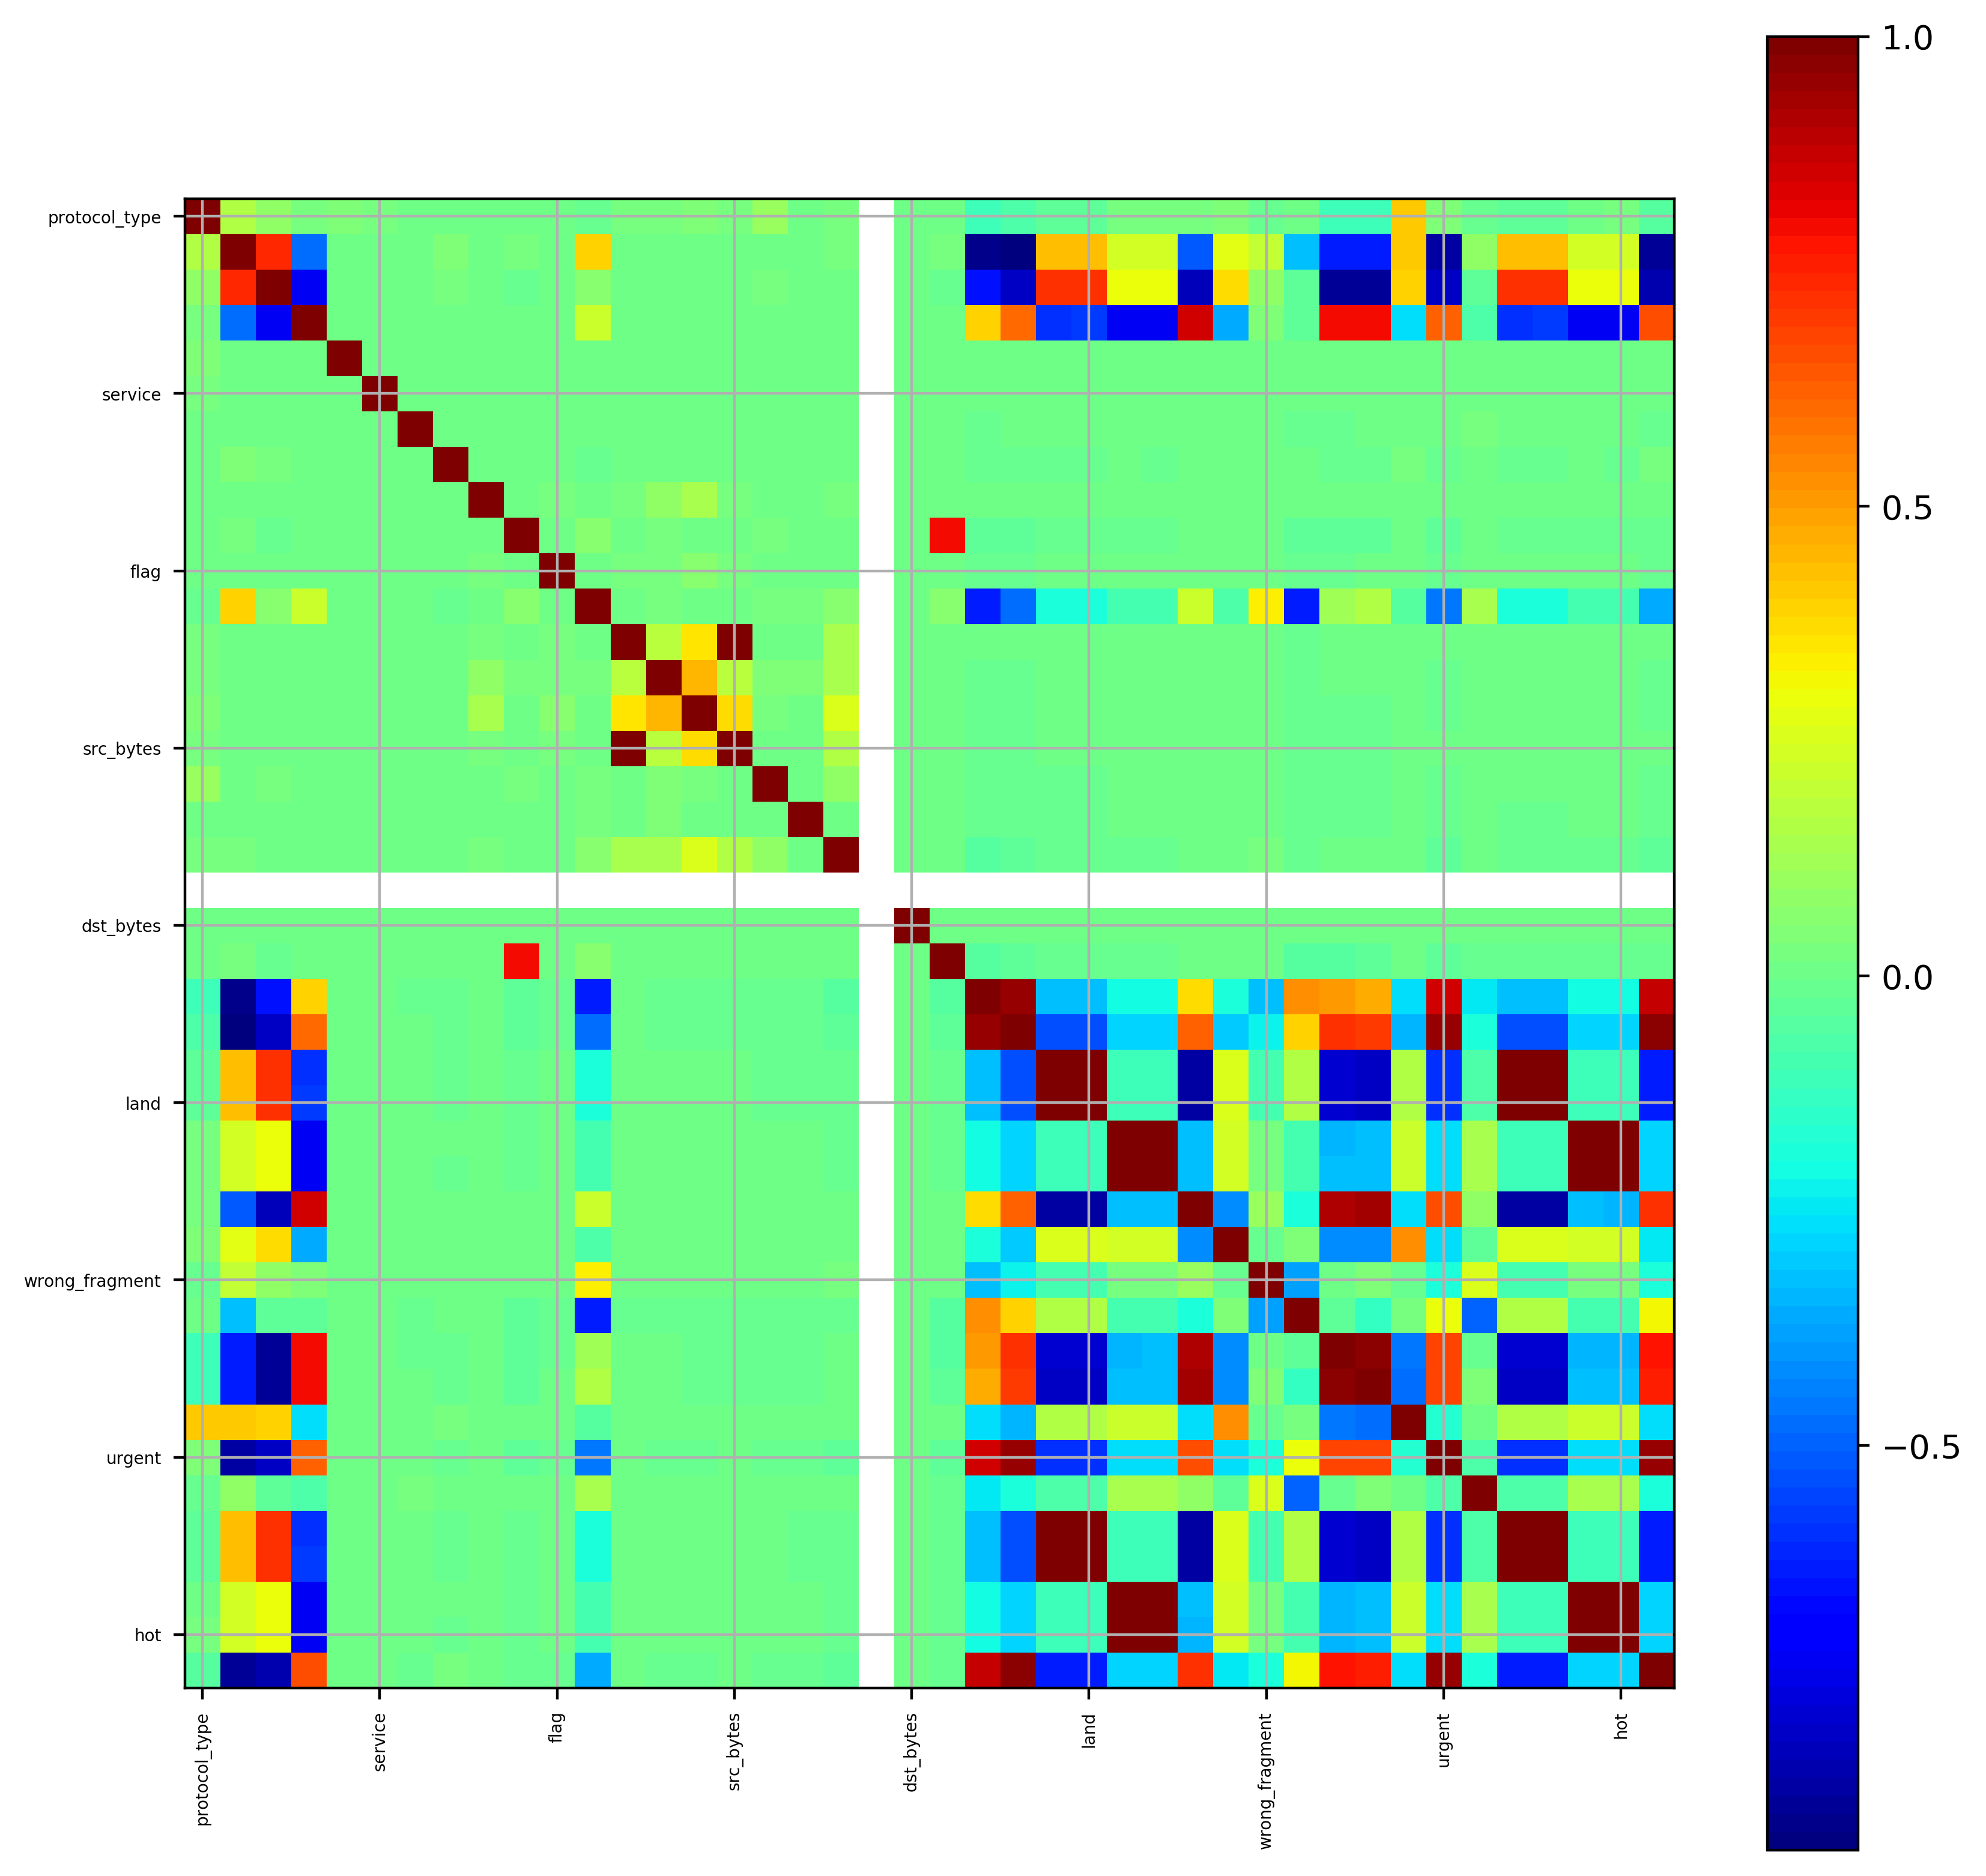

In [40]:
l_cor=kdd.train_data.corr()
def show_correlation_matrix(cor, labels):
    fig = plt.figure(figsize=(10, 10), dpi=400)
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 100)
    cax = ax1.imshow(cor, interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    ax1.set_xticklabels(labels,fontsize=5, rotation="vertical")
    ax1.set_yticklabels(labels,fontsize=5)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1, -.5,0,.5,1])
    plt.show()

show_correlation_matrix(l_cor, kdd.COLUMNS)

### Feature correlation with taget labels (connection type):

In [41]:
l_cor["connection_type"]

duration                      -0.052
protocol_type                 -0.888
service                       -0.843
flag                           0.666
src_bytes                      0.000
dst_bytes                     -0.001
land                          -0.004
wrong_fragment                 0.018
urgent                        -0.001
hot                           -0.020
num_failed_logins             -0.007
logged_in                     -0.364
num_compromised               -0.002
root_shell                    -0.008
su_attempted                  -0.004
num_root                      -0.003
num_file_creations            -0.009
num_shells                    -0.008
num_access_files              -0.025
num_outbound_cmds                nan
is_host_login                 -0.001
is_guest_login                -0.020
count                          0.883
srv_count                      0.973
serror_rate                   -0.640
srv_serror_rate               -0.639
rerror_rate                   -0.285
s

### <font color='green'>Ignoring "num_outbound_cmds" and "is_host_login" features as their variance is neglgible resulting in "NaN" close to zero correlation.</font>

## Feature Reduction:

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

X, y = kdd.train_data[kdd.COLUMNS[:-1]].values, kdd.train_data["connection_type"].values
fr = SelectKBest(chi2, k=39)
X_new = fr.fit_transform(X, y)
fr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [43]:
# List of features reduced
support_f = (fr.get_support()).tolist()
[kdd.COLUMNS[x] for x in range(len(support_f)) if support_f[x] == False]

['num_outbound_cmds', 'is_host_login']

## Model Training:

In [44]:
# Scaling features
std_scaler = pre.StandardScaler()
X_new_tr = std_scaler.fit_transform(X_new)

# Training Model
clf=SGDClassifier().fit(X_new_tr, y)

## Error Analysis:

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(clf, X_new_tr, y, cv=2)

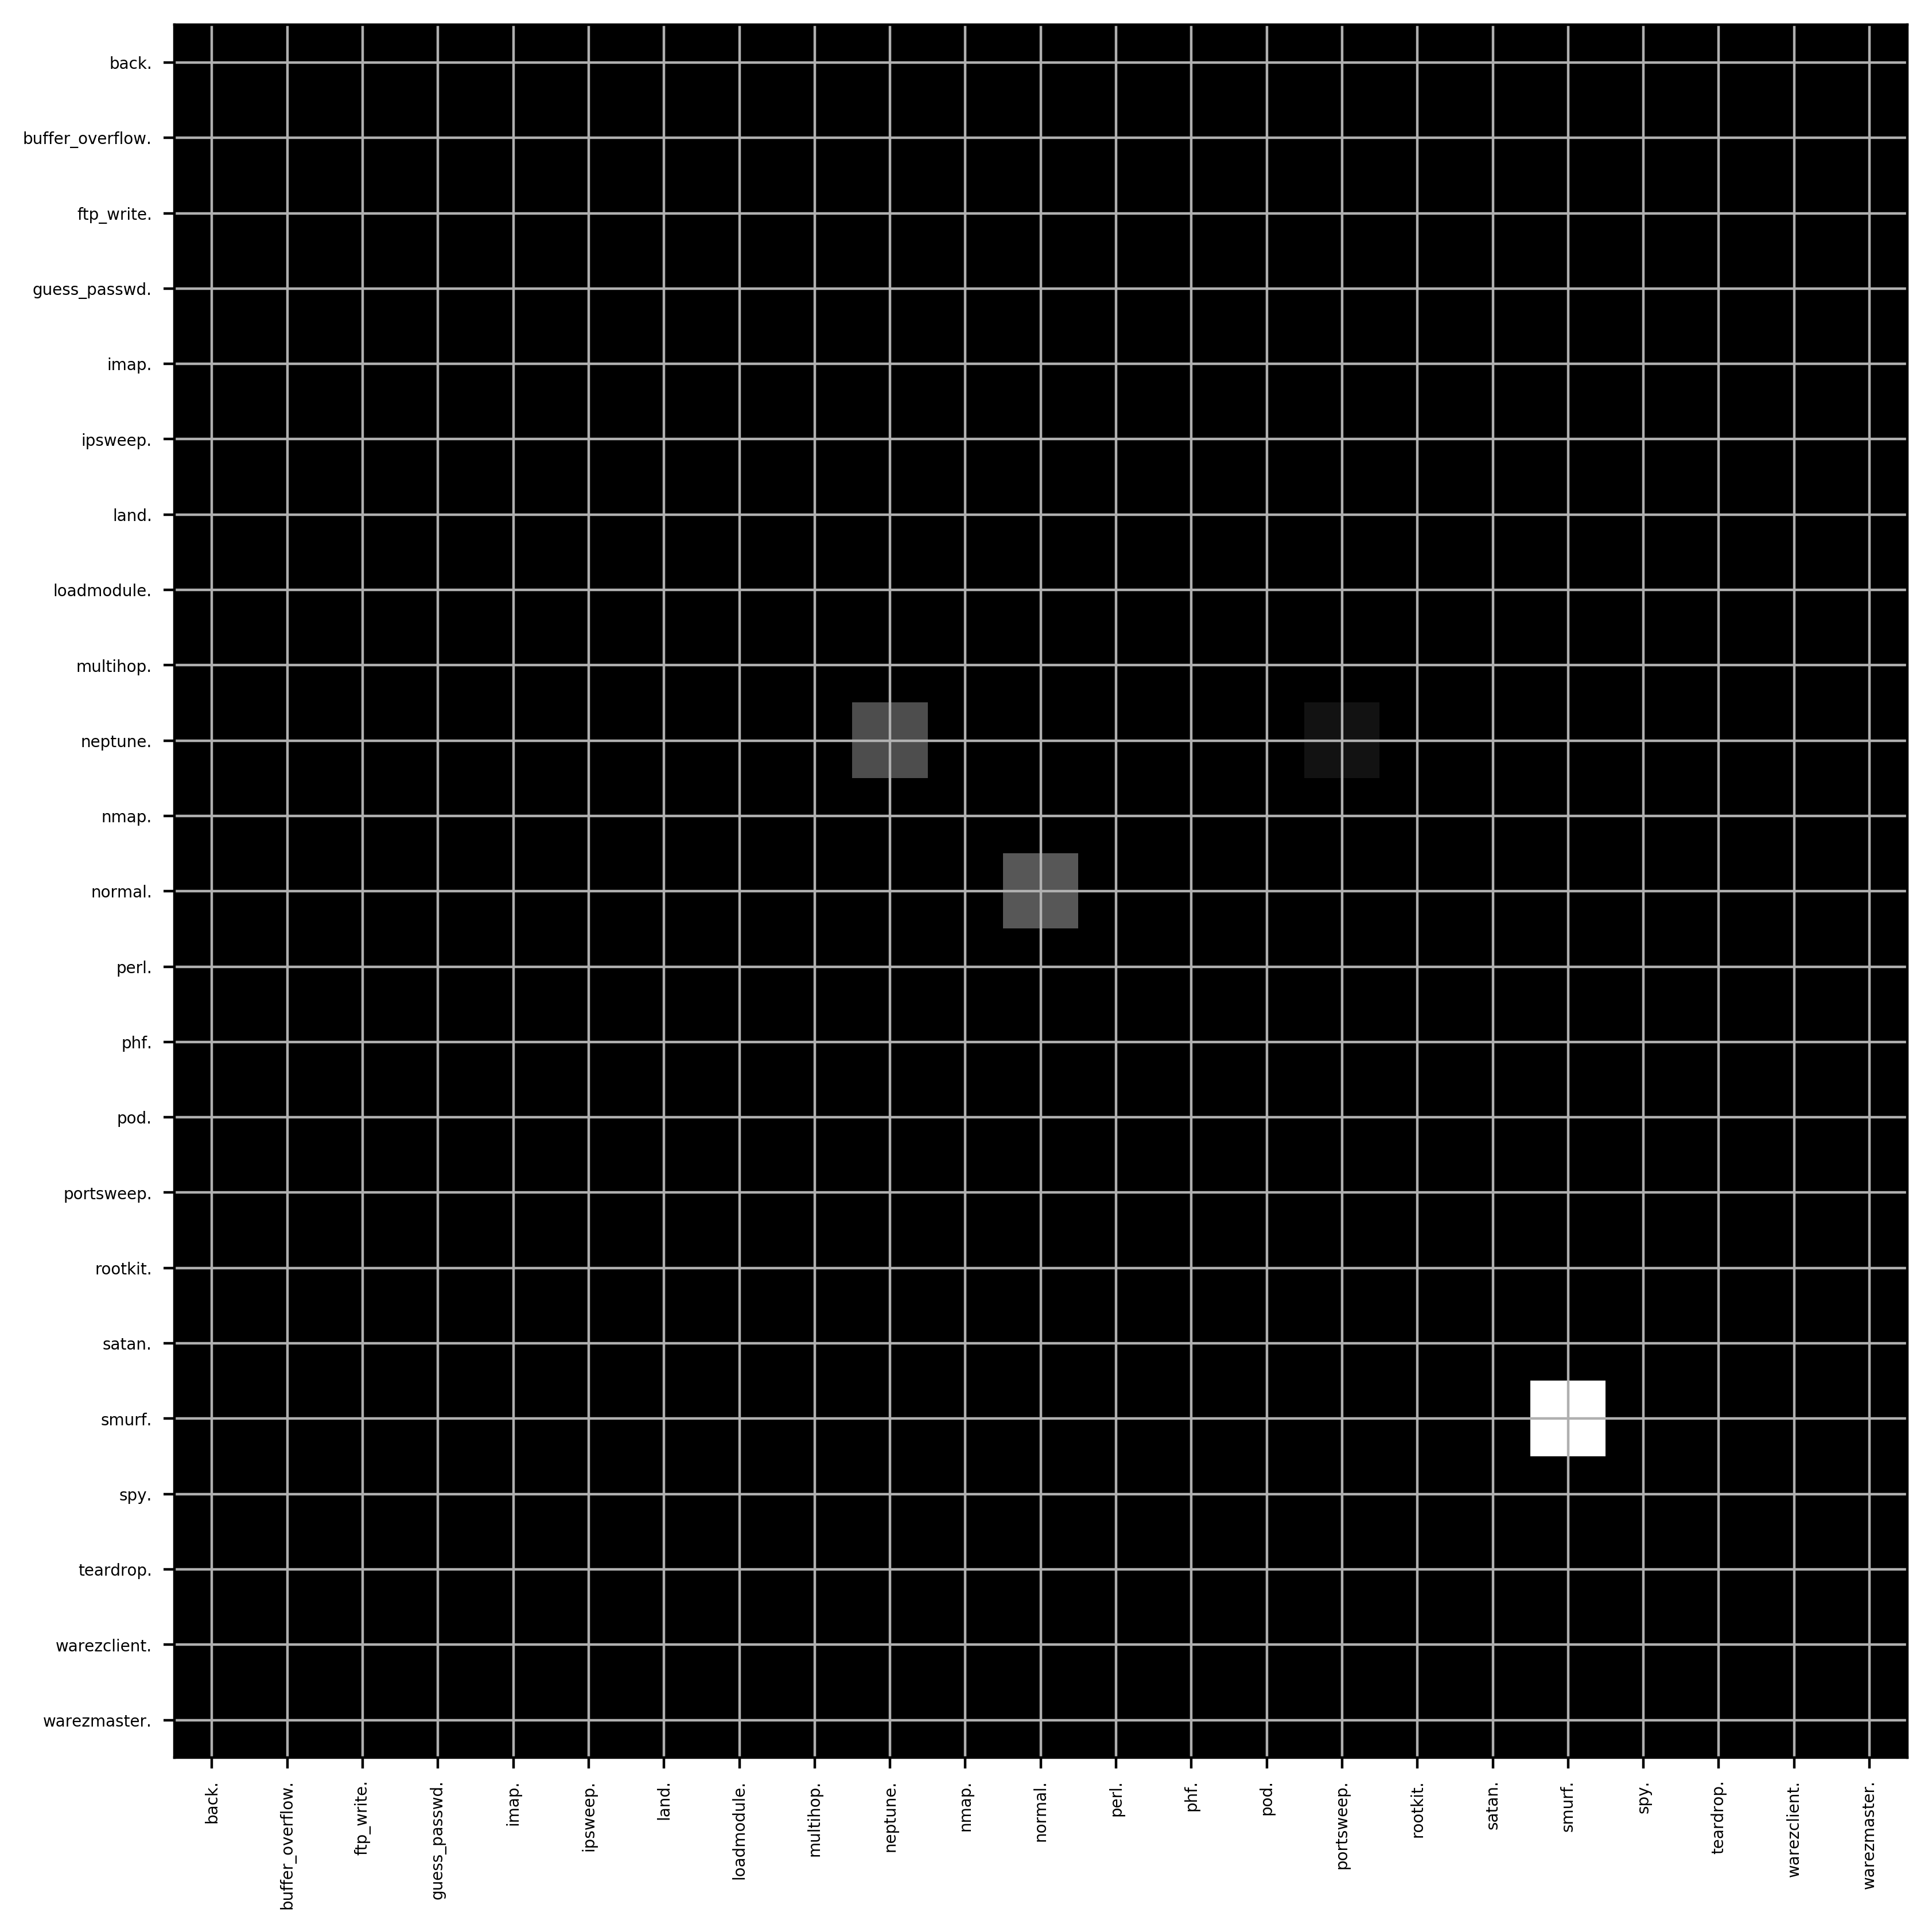

In [55]:
import numpy as np

def show_confusion_matrix(cor, labels):
    fig = plt.figure(figsize=(10, 10), dpi=400)
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('gray', 100)
    cax = ax1.imshow(cor, cmap=cmap)
    ax1.grid(True)
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_xticklabels(labels,fontsize=5, rotation="vertical")
    ax1.set_yticks(np.arange(len(labels)))
    ax1.set_yticklabels(labels,fontsize=5)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    #fig.colorbar(cax, ticks=[-1, -.5,0,.5,1])
    plt.show()

show_confusion_matrix(confusion_matrix(y, y_pred), list(kdd.le4_train.classes_))